In [1]:
#import stuff we will need
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from prep import remove_outlier,clean_zillow, train_validate_test, get_object_cols, get_numeric_X_cols, min_max_scale
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#import functions from my .py files
from acquire import new_zillow, get_zillow_data

# Acquire Stage 

In [2]:
#acquire our Zillow data from CodeUp server by parcel id specifically those that are single unit property values.
df = new_zillow()

In [3]:
df

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,None,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,None,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,None,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,None,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,-0.146056,2017-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38617,14453399,356752,NaN,NaN,NaN,3.0,5.0,None,NaN,3.0,...,852813.0,2016.0,496831.0,11662.88,None,NaN,6.059032e+13,72840,0.062928,2017-08-31
38618,12019061,2108804,1.0,NaN,NaN,2.0,1.0,None,9.0,2.0,...,492395.0,2016.0,366200.0,6023.37,None,NaN,6.037701e+13,72841,0.000231,2017-08-31
38619,11570288,108621,1.0,NaN,NaN,2.0,2.0,None,7.0,2.0,...,600608.0,2016.0,446625.0,7255.87,None,NaN,6.037264e+13,72842,-0.003178,2017-08-31
38620,11128688,2001476,1.0,NaN,NaN,3.0,5.0,None,7.0,3.0,...,1120000.0,2016.0,728000.0,13663.03,None,NaN,6.037108e+13,72843,0.024946,2017-08-31


In [4]:
## Function saves to csv 
df = get_zillow_data()

In [5]:
df

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,NaN,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,NaN,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,NaN,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,-0.146056,2017-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38617,14453399,356752,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,852813.0,2016.0,496831.0,11662.88,NaN,NaN,6.059032e+13,72840,0.062928,2017-08-31
38618,12019061,2108804,1.0,NaN,NaN,2.0,1.0,NaN,9.0,2.0,...,492395.0,2016.0,366200.0,6023.37,NaN,NaN,6.037701e+13,72841,0.000231,2017-08-31
38619,11570288,108621,1.0,NaN,NaN,2.0,2.0,NaN,7.0,2.0,...,600608.0,2016.0,446625.0,7255.87,NaN,NaN,6.037264e+13,72842,-0.003178,2017-08-31
38620,11128688,2001476,1.0,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,1120000.0,2016.0,728000.0,13663.03,NaN,NaN,6.037108e+13,72843,0.024946,2017-08-31


In [6]:
df.min()

parcelid                                10711855
id                                           349
airconditioningtypeid                        1.0
architecturalstyletypeid                     2.0
basementsqft                               100.0
bathroomcnt                                  0.0
bedroomcnt                                   0.0
buildingclasstypeid                          NaN
buildingqualitytypeid                        1.0
calculatedbathnbr                            1.0
decktypeid                                  66.0
finishedfloor1squarefeet                    47.0
calculatedfinishedsquarefeet               240.0
finishedsquarefeet12                       240.0
finishedsquarefeet13                      1056.0
finishedsquarefeet15                       600.0
finishedsquarefeet50                        47.0
finishedsquarefeet6                        380.0
fips                                      6037.0
fireplacecnt                                 1.0
fullbathcnt         

In [7]:
# focus on the year 2017
df['age'] = 2017-df['yearbuilt']

In [8]:
df.head(10)

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate,age
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,2016.0,213516.0,3490.16,NaN,NaN,6.059001e+13,625,-0.061973,2017-08-04,43.0
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,163175.0,2627.48,NaN,NaN,6.037220e+13,1018,0.017785,2017-07-21,94.0
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23,47.0
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,NaN,9.0,2.0,...,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28,37.0
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,-0.146056,2017-06-30,106.0
5,14269464,1923117,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,2016.0,445569.0,9819.72,NaN,NaN,6.059064e+13,2028,0.021085,2017-06-01,14.0
6,11446756,451211,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,46573.0,1399.27,NaN,NaN,6.037650e+13,2681,-0.163064,2017-08-23,62.0
7,11389003,2121349,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,449000.0,7673.19,NaN,NaN,6.037703e+13,3273,-0.325393,2017-06-01,68.0
8,11967869,2093710,NaN,NaN,NaN,1.0,2.0,NaN,5.0,1.0,...,2016.0,191821.0,3267.47,NaN,NaN,6.037185e+13,3429,-0.005566,2017-06-29,96.0
9,11429175,1719104,NaN,NaN,NaN,2.0,4.0,NaN,6.0,2.0,...,2016.0,68641.0,2169.62,NaN,NaN,6.037603e+13,3905,-0.064447,2017-08-23,62.0


In [9]:
df.describe()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror,age
count,3.862200e+04,3.862200e+04,12224.000000,101.000000,27.000000,38622.000000,38622.000000,0.0,23706.000000,38463.000000,...,3.857000e+04,3.862100e+04,38622.0,3.862100e+04,38621.000000,1268.000000,3.847800e+04,38622.000000,38622.000000,38486.000000
mean,1.310495e+07,1.500394e+06,1.900196,7.564356,639.703704,2.273743,3.010512,NaN,6.610394,2.282739,...,1.907161e+05,4.965779e+05,2016.0,3.061136e+05,6042.953623,14.070978,6.050206e+13,52116.933794,0.015917,47.485709
std,3.700741e+06,8.591808e+05,3.112632,3.232386,445.977907,0.950588,1.029506,NaN,1.694360,0.941702,...,2.384221e+05,6.326909e+05,0.0,4.583442e+05,7366.777380,1.482764,2.126099e+11,12046.770714,0.172150,23.055778
min,1.071186e+07,3.490000e+02,1.000000,2.000000,100.000000,0.000000,0.000000,NaN,1.000000,1.000000,...,1.290000e+02,1.000000e+03,2016.0,1.000000e+03,19.920000,7.000000,6.037101e+13,625.000000,-4.453964,1.000000
25%,1.154805e+07,7.599932e+05,1.000000,7.000000,349.000000,2.000000,2.000000,NaN,6.000000,2.000000,...,8.451250e+04,2.090510e+05,2016.0,8.702300e+04,2720.440000,14.000000,6.037400e+13,41836.250000,-0.023433,30.000000
50%,1.260418e+07,1.507182e+06,1.000000,7.000000,604.000000,2.000000,3.000000,NaN,7.000000,2.000000,...,1.369250e+05,3.635160e+05,2016.0,2.080000e+05,4464.540000,15.000000,6.037651e+13,52156.500000,0.006802,46.000000
75%,1.429905e+07,2.242966e+06,1.000000,7.000000,743.000000,3.000000,4.000000,NaN,8.000000,3.000000,...,2.199940e+05,5.778040e+05,2016.0,3.761050e+05,6984.240000,15.000000,6.059052e+13,62495.750000,0.037605,63.000000
max,1.676878e+08,2.982274e+06,13.000000,21.000000,1969.000000,11.000000,12.000000,NaN,12.000000,11.000000,...,1.142179e+07,2.385837e+07,2016.0,1.635060e+07,276797.830000,15.000000,6.111009e+13,72844.000000,3.175688,139.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38622 entries, 0 to 38621
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      38622 non-null  int64  
 1   id                            38622 non-null  int64  
 2   airconditioningtypeid         12224 non-null  float64
 3   architecturalstyletypeid      101 non-null    float64
 4   basementsqft                  27 non-null     float64
 5   bathroomcnt                   38622 non-null  float64
 6   bedroomcnt                    38622 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         23706 non-null  float64
 9   calculatedbathnbr             38463 non-null  float64
 10  decktypeid                    333 non-null    float64
 11  finishedfloor1squarefeet      3339 non-null   float64
 12  calculatedfinishedsquarefeet  38509 non-null  float64
 13  f

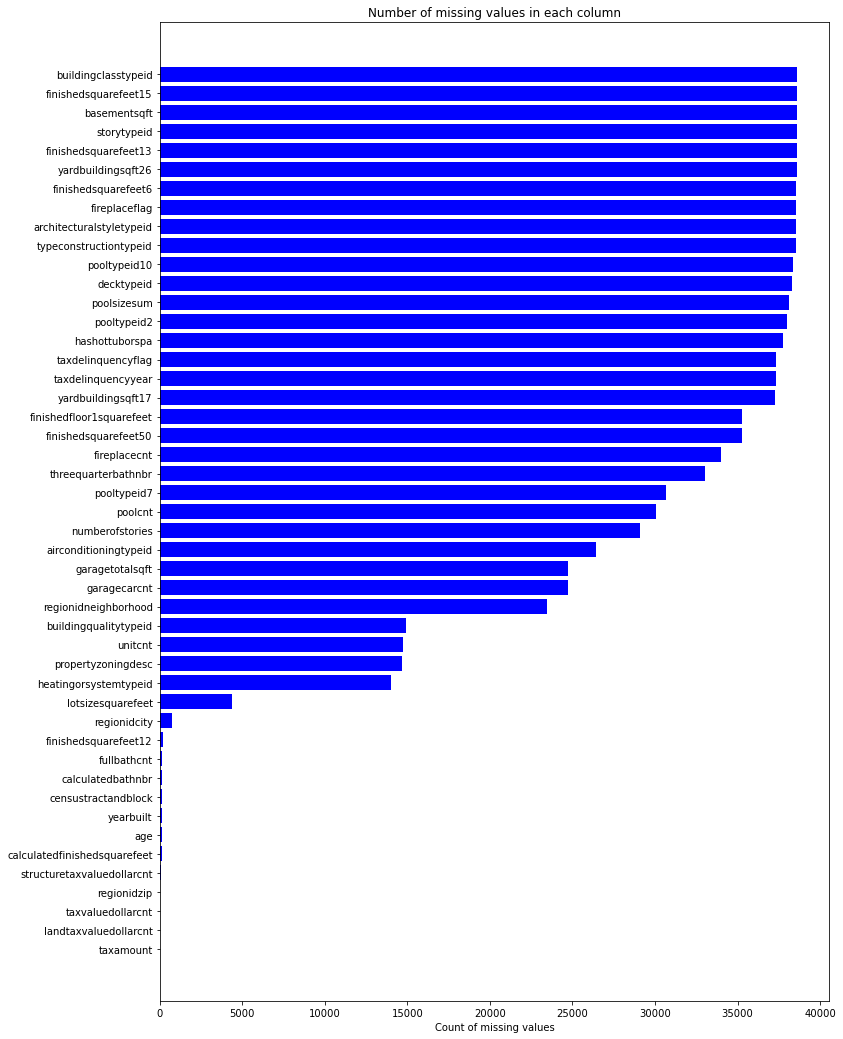

In [11]:
# visualize missing values

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [12]:
# calcuate missing %
percent_mis = df.isna().sum().sort_values(ascending = False)/len(df)
percent_mis

buildingclasstypeid          1.000000
finishedsquarefeet15         0.999896
basementsqft                 0.999301
storytypeid                  0.999301
finishedsquarefeet13         0.999197
                               ...   
propertycountylandusecode    0.000000
propertylandusetypeid        0.000000
rawcensustractandblock       0.000000
regionidcounty               0.000000
parcelid                     0.000000
Length: 63, dtype: float64

In [13]:
def clean_zillow(df):
    '''
    this function takes in an unclean zillow df and does the following:
    1.) keeps only columns we need are considering. 'parcelid', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt','taxvaluedollarcnt', 'yearbuilt','fips'
    2.) drops nulls
    3.) renames columns for ease of use.
    4.) creates new columns that we may use.
    '''
    #select features for df
    features = ['parcelid', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'taxvaluedollarcnt', 'yearbuilt','fips']
    df = df[features]
    #for the yearbuilt column, fill in nulls with 2017.
    df['yearbuilt'].fillna(2017, inplace = True)
    #create a new column named 'age', which is 2017 minus the yearbuilt
    df['age'] = 2017-df['yearbuilt']
    
    #drop duplicates in parcelid
    df = df.drop_duplicates(subset=['parcelid'])
    
    #rename columns for easier use
    df = df.rename(columns={
                            'parcelid': 'parcel_id',
                            'calculatedfinishedsquarefeet': 'sqft',
                            'bathroomcnt': 'baths',
                            'bedroomcnt': 'beds',
                            'taxvaluedollarcnt':'tax_value'
        
    })
    
    #set index
    df = df.set_index('parcel_id')
    #drop nulls in sqft and tax_value
    df = df.dropna(subset=['sqft','tax_value'])
    #drop year_built, we can just use age.
    df = df.drop(columns=['yearbuilt'])
    
    return df

In [14]:
df = clean_zillow(df)

In [15]:
df

,sqft,baths,beds,tax_value,fips,age
parcel_id,,,,,,
14634203,1125.0,2.0,3.0,289445.0,6059.0,43.0
11721753,1316.0,2.0,3.0,205123.0,6037.0,94.0
11289917,1458.0,2.0,3.0,136104.0,6037.0,47.0
11637029,1766.0,2.0,3.0,810694.0,6037.0,37.0
11705026,1421.0,1.0,2.0,35606.0,6037.0,106.0
...,...,...,...,...,...,...
14453399,3015.0,3.0,5.0,852813.0,6059.0,15.0
12019061,769.0,2.0,1.0,492395.0,6037.0,53.0
11570288,1212.0,2.0,2.0,600608.0,6037.0,48.0


In [16]:
df.max()

sqft            17245.0
baths              11.0
beds               12.0
tax_value    23858374.0
fips             6111.0
age               139.0
dtype: float64

In [17]:
df.min()

sqft          240.0
baths           0.0
beds            0.0
tax_value    1000.0
fips         6037.0
age             0.0
dtype: float64

# Prepare

In [18]:
df = remove_outlier(df)

In [19]:
df

,sqft,baths,beds,tax_value,fips,age
parcel_id,,,,,,
14634203,1125.0,2.0,3.0,289445.0,6059.0,43.0
11721753,1316.0,2.0,3.0,205123.0,6037.0,94.0
11289917,1458.0,2.0,3.0,136104.0,6037.0,47.0
11637029,1766.0,2.0,3.0,810694.0,6037.0,37.0
11705026,1421.0,1.0,2.0,35606.0,6037.0,106.0
...,...,...,...,...,...,...
14453399,3015.0,3.0,5.0,852813.0,6059.0,15.0
12019061,769.0,2.0,1.0,492395.0,6037.0,53.0
11570288,1212.0,2.0,2.0,600608.0,6037.0,48.0


In [20]:
df.isna().sum()

sqft         0
baths        0
beds         0
tax_value    0
fips         0
age          0
dtype: int64

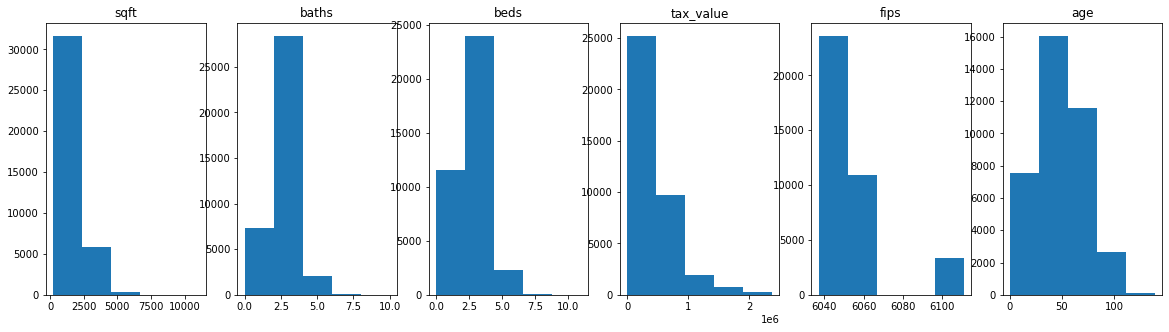

In [21]:
plt.figure(figsize=(20, 5))

# List of columns
cols = ['sqft', 'baths', 'beds', 'tax_value','fips','age']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,6, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

In [22]:
target = 'tax_value'

In [23]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)

In [24]:
train.shape, validate.shape, test.shape

((21238, 6), (9103, 6), (7586, 6))

In [25]:
obj_cols = get_object_cols(df)

In [26]:
num_cols = get_numeric_X_cols(X_train, obj_cols)

In [27]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, num_cols)

In [28]:
X_train_scaled

,sqft,baths,beds,fips,age
13850720,0.150306,0.2500,0.363636,0.297297,0.417266
11788265,0.037855,0.1250,0.090909,0.000000,0.676259
12738578,0.143069,0.2500,0.272727,0.000000,0.402878
12264415,0.034329,0.1250,0.181818,0.000000,0.489209
12682786,0.138987,0.2500,0.363636,0.000000,0.438849
...,...,...,...,...,...
14608400,0.098905,0.3125,0.181818,0.297297,0.093525
12896021,0.059009,0.2500,0.181818,0.000000,0.266187
14463176,0.173873,0.3750,0.363636,0.297297,0.129496
14394382,0.136853,0.3125,0.272727,0.297297,0.194245


In [34]:
df.shape

(37927, 6)